In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
train = pd.read_csv(r'data/titanic_train.csv')

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

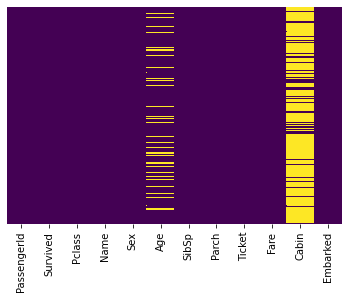

In [15]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

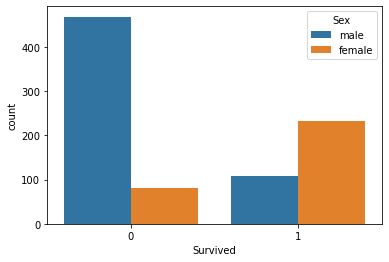

In [17]:
sns.countplot(x='Survived', hue='Sex', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

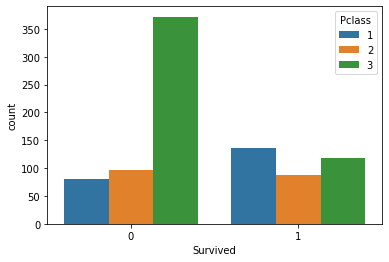

In [20]:
sns.countplot(x='Survived', hue='Pclass', data=train)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='SibSp', ylabel='count'>

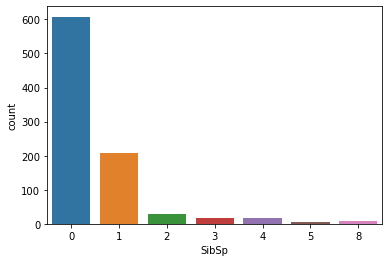

In [24]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

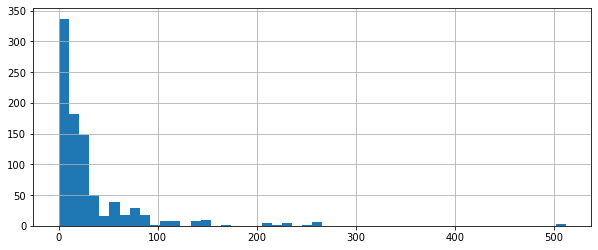

In [29]:
train.Fare.hist(bins=50, figsize=(10,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

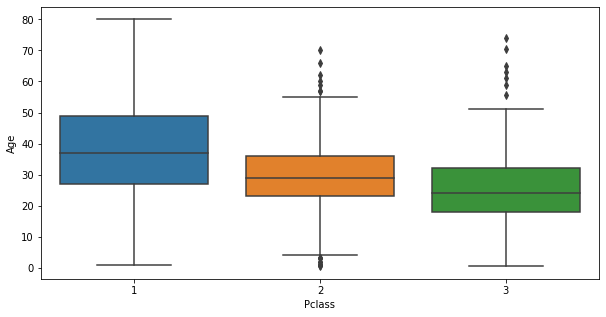

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(data=train,
             x='Pclass',
             y='Age')

In [47]:
def age_cal(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [52]:
train['Age']=train[['Age','Pclass']].apply(age_cal, axis=1)

In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,24.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

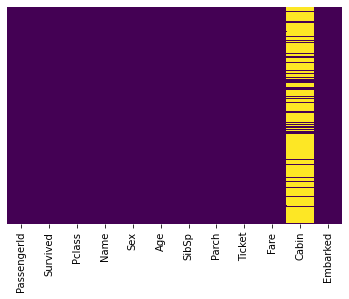

In [54]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [55]:
train.drop('Cabin', axis=1, inplace=True)

In [56]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,24.0,0,0,373450,8.0500,S


In [59]:
train.dropna(inplace=True)

<AxesSubplot:>

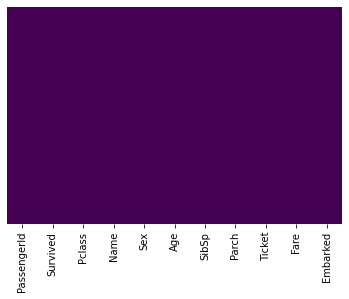

In [60]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [61]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [64]:
sex=pd.get_dummies(train.Sex, drop_first=True)

In [65]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [67]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [68]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [69]:
train = pd.concat([train, sex, embark], axis=1)

In [70]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,24.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,24.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,24.0,0,0,373450,8.0500,S,1,0,1


In [72]:
train.drop(['PassengerId','Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [73]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,24.0,1,0,7.2500,1,0,1
1,1,1,37.0,1,0,71.2833,0,0,0
2,1,3,24.0,0,0,7.9250,0,0,1
3,1,1,37.0,1,0,53.1000,0,0,1
4,0,3,24.0,0,0,8.0500,1,0,1


In [74]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [75]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=101)

In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
model = LogisticRegression()

In [124]:
model.fit(X_train, y_train)

LogisticRegression()

In [125]:
predictions = model.predict(X_test)

In [126]:
from sklearn.metrics import classification_report

In [127]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       188
           1       0.82      0.65      0.73       124

    accuracy                           0.80       312
   macro avg       0.81      0.78      0.79       312
weighted avg       0.81      0.80      0.80       312



In [128]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [129]:
confusion_matrix(y_test, predictions)

array([[170,  18],
       [ 43,  81]], dtype=int64)

In [130]:
accuracy_score(y_test, predictions)

0.8044871794871795